In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Vaccination table, stratified by date and age group

<b> This is a fact table, with actual amounts for each day and age group.

In [2]:
vaccinated_by_age = pd.read_csv('vaccinated_age-per-day.csv')
vaccinated_by_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   VaccinationDate  1008 non-null   object
 1   age_group        1008 non-null   object
 2   first_dose       1008 non-null   object
 3   second_dose      1008 non-null   object
dtypes: object(4)
memory usage: 31.6+ KB


In [3]:
vaccinated_by_age.describe()

,VaccinationDate,age_group,first_dose,second_dose
count,1008,1008,1008,1008
unique,112,9,916,769
top,2021-03-17,50-59,<15,0
freq,9,112,16,189


In [4]:
# Replacing the categorical values
vaccinated_by_age.sort_values(by= ['VaccinationDate', 'age_group'], inplace= True)
vaccinated_by_age.replace(to_replace= '<15', value= '7', inplace= True)

In [5]:
vaccinated_by_age

,VaccinationDate,age_group,first_dose,second_dose
1,2020-12-20,0-19,7,0
0,2020-12-20,20-29,343,0
8,2020-12-20,30-39,1172,0
7,2020-12-20,40-49,1817,0
4,2020-12-20,50-59,1827,0
...,...,...,...,...
1000,2021-04-10,50-59,150,315
999,2021-04-10,60-69,82,125
1005,2021-04-10,70-79,40,58
1001,2021-04-10,80-89,7,26


In [6]:
pivoted_df = vaccinated_by_age.pivot(index= 'VaccinationDate', columns= 'age_group', values= ['first_dose', 'second_dose'])

In [7]:
pivoted_df = pivoted_df.astype(int)

In [8]:
def merge_columns_to_80plus(df):
    df['80+'] = df['80-89'] + df['90+']
    df.drop(labels= ['80-89', '90+'], axis= 1, inplace= True)
    return df

In [9]:
pivoted_df_first_dose = merge_columns_to_80plus(pivoted_df['first_dose'])
pivoted_df_second_dose = merge_columns_to_80plus(pivoted_df['second_dose'])

<ipython-input-8-76d3e4d1ed32>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['80+'] = df['80-89'] + df['90+']
/Users/yotamdery/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [10]:
pivoted_df_first_dose

age_group,0-19,20-29,30-39,40-49,50-59,60-69,70-79,80+
VaccinationDate,,,,,,,,
2020-12-20,7,343,1172,1817,1827,1568,523,101
2020-12-21,47,954,2717,3751,3705,7110,5159,1429
2020-12-22,78,1444,3556,4503,4588,13898,12355,4181
2020-12-23,131,1963,3796,4947,5313,20694,18896,7060
2020-12-24,156,1954,3703,5123,5565,24544,22739,9510
...,...,...,...,...,...,...,...,...
2021-04-06,1074,2340,1909,1231,827,546,373,250
2021-04-07,1097,2533,1853,1192,840,590,306,255
2021-04-08,1152,2603,2125,1402,901,602,307,254


In [11]:
pivoted_df_first_dose

age_group,0-19,20-29,30-39,40-49,50-59,60-69,70-79,80+
VaccinationDate,,,,,,,,
2020-12-20,7,343,1172,1817,1827,1568,523,101
2020-12-21,47,954,2717,3751,3705,7110,5159,1429
2020-12-22,78,1444,3556,4503,4588,13898,12355,4181
2020-12-23,131,1963,3796,4947,5313,20694,18896,7060
2020-12-24,156,1954,3703,5123,5565,24544,22739,9510
...,...,...,...,...,...,...,...,...
2021-04-06,1074,2340,1909,1231,827,546,373,250
2021-04-07,1097,2533,1853,1192,840,590,306,255
2021-04-08,1152,2603,2125,1402,901,602,307,254


<b> plotting the first dose grouped by age figure:

<AxesSubplot:title={'center':'# of vaccinated (1st dose) per age group over time'}, xlabel='VaccinationDate', ylabel='# of vaccinations'>

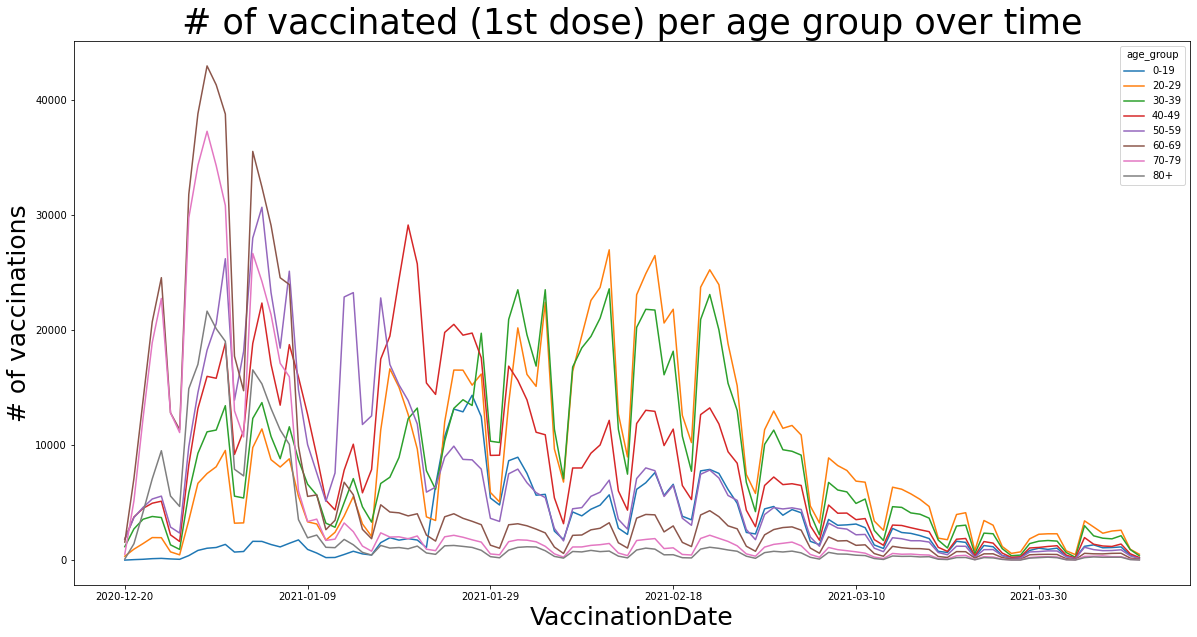

In [12]:
fig, axes = plt.subplots(figsize=(20,10))
axes.set_ylabel('# of vaccinated individuals', fontsize=25)
axes.set_title('# of vaccinated (1st dose) per age group over time', fontsize=35)
axes.set_xlabel('Date', fontsize= 25)
pivoted_df_first_dose.plot(ax= axes)

<b> plotting the second dose grouped by age figure:

<AxesSubplot:title={'center':'# of vaccinated (2nd dose) per age group over time'}, xlabel='VaccinationDate', ylabel='# of vaccinated individuals'>

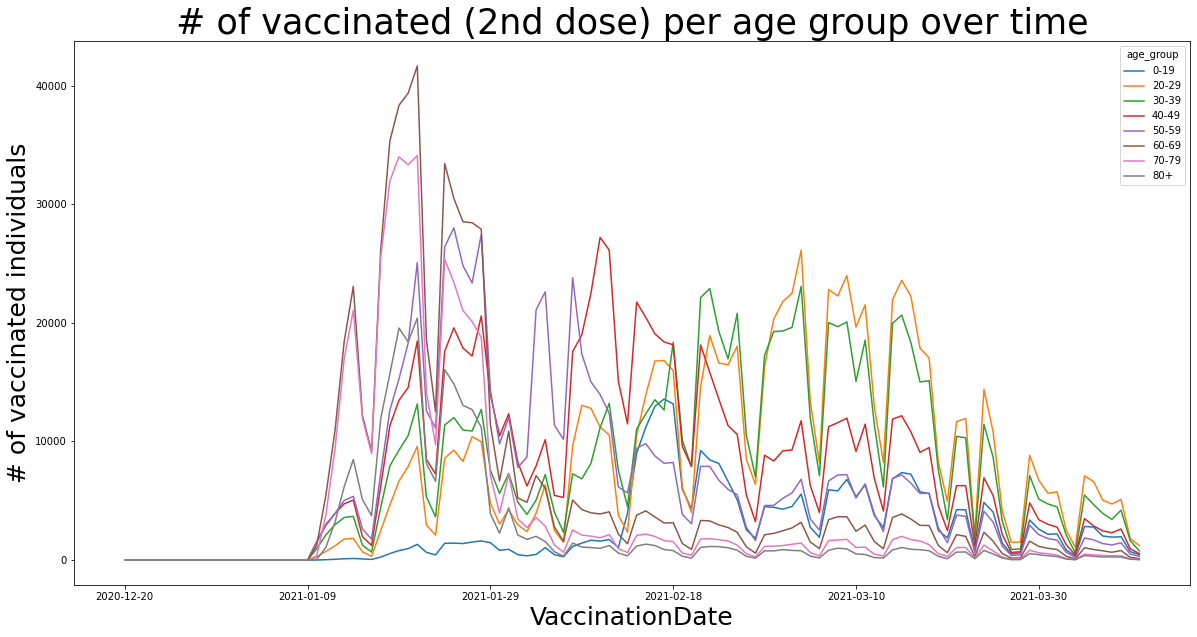

In [16]:
fig, axes = plt.subplots(figsize=(20,10))
axes.set_ylabel('# of vaccinated individuals', fontsize=25)
axes.set_title('# of vaccinated (2nd dose) per age group over time', fontsize=35)
axes.set_xlabel('Date', fontsize= 25)
pivoted_df_second_dose.plot(ax= axes)